In [1]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tools import add_constant

In [2]:
df= pd.read_excel(r'C:\Users\Julia Han\Desktop\24 spring2\3 Empirical Fin\Assignment 3\assignment3.xlsx')
display(df.head())

,Day,A,B,CEO for A,Text 1,Text 2
0,1,-1.139378,1.360625,John,Breakthrough in AI Research Promises New Era o...,Breakthrough Cancer Drug Shows Promising Resul...
1,2,-0.341601,0.554015,John,NaN,NaN
2,3,-0.552410,0.478340,John,NaN,Controversy Surrounds Biopharma Firm Over Alle...
3,4,-0.486415,0.174903,John,Setback in Quantum Computing Research Raises D...,NaN
4,5,-0.535225,0.631699,John,NaN,NaN


In [3]:
sia = SentimentIntensityAnalyzer()
def sentiment_score(text):
    return sia.polarity_scores(text)['compound'] if not pd.isnull(text) else 0

In [4]:
df['S1'] = df['Text 1'].apply(sentiment_score)
df['S2'] = df['Text 2'].apply(sentiment_score)

# Calculate sample averages
S1_sample_mean = df['S1'].mean()
S2_sample_mean = df['S2'].mean()

print(f'Sample Average of S1: {S1_sample_mean:}.')
print(f'Sample Average of S2: {S2_sample_mean:}.')

Sample Average of S1: -0.0024071428571428555.
Sample Average of S2: 0.010255714285714288.


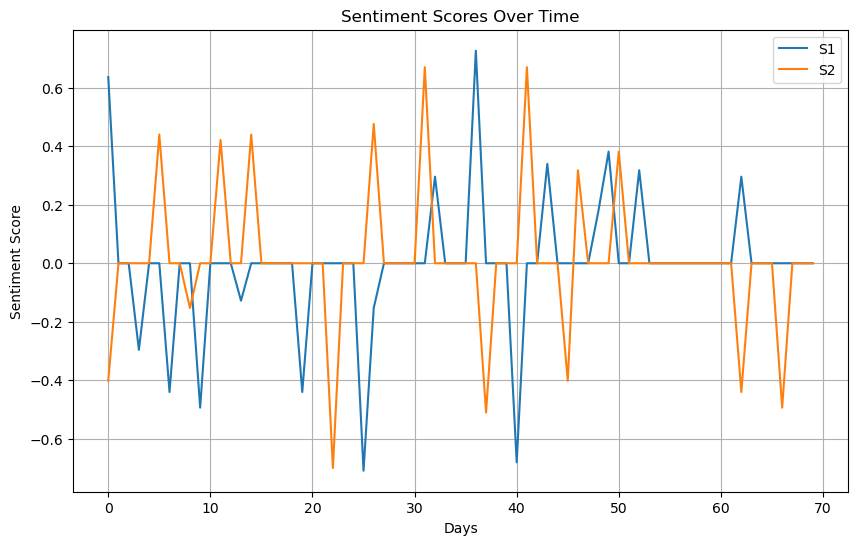

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(df['S1'], label='S1')
plt.plot(df['S2'], label='S2')
plt.xlabel('Days')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Scores Over Time')
plt.legend()
plt.grid(True)
plt.show()

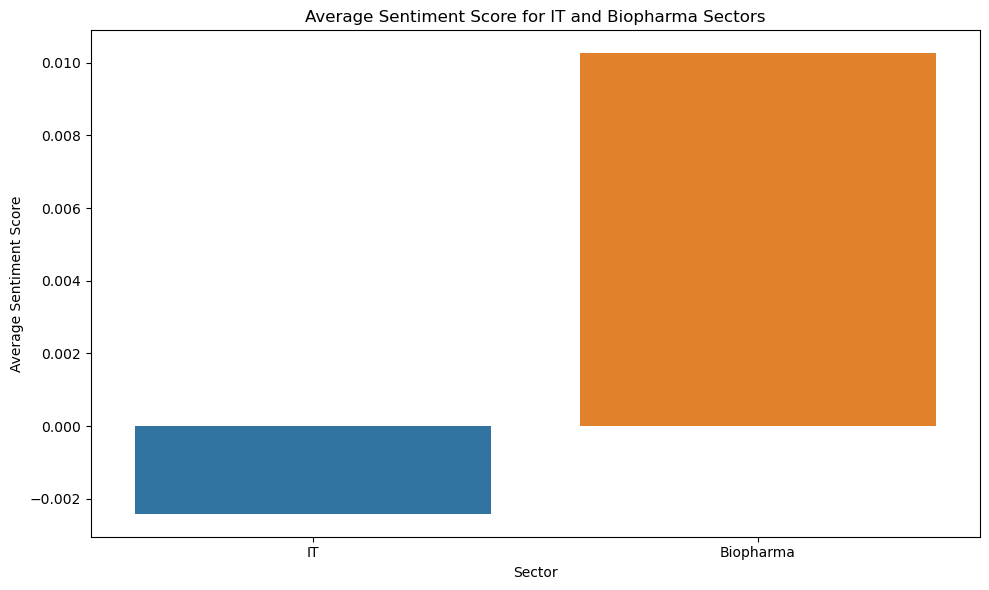

In [6]:
plt.figure(figsize=(10, 6))
sns.barplot(x=['IT', 'Biopharma'], y=[S1_sample_mean, S2_sample_mean])
plt.xlabel('Sector')
plt.ylabel('Average Sentiment Score')
plt.title('Average Sentiment Score for IT and Biopharma Sectors')
plt.tight_layout()
plt.show()

2. 

In [7]:
rtrn_B=df['B']

def regssion_summary(x, y, model_name):

    x_with_const = add_constant(x)
   
    model = sm.OLS(y, x_with_const).fit()
   
    print(f"Regression Summary for {model_name}:")
    print(model.summary())

    # Display coefficient estimates and R-squared value
    print(f"Coefficient Estimates on Sentiment Vector {model_name[-1]}:", model.params[x.name])
    print("Adjusted R-squared value:", model.rsquared_adj)

# Fit and print summaries for each model
regssion_summary(df['S1'], rtrn_B, "Model 1")
print() 
regssion_summary(df['S2'], rtrn_B, "Model 2")

Regression Summary for Model 1:
                            OLS Regression Results                            
Dep. Variable:                      B   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     695.7
Date:                Mon, 13 May 2024   Prob (F-statistic):           1.95e-37
Time:                        16:11:38   Log-Likelihood:                 61.881
No. Observations:                  70   AIC:                            -119.8
Df Residuals:                      68   BIC:                            -115.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.500

The coefficient estimate for S1 is positive and statistically significant (p-value>0.05), while the coefficient estimate for S2 is negative and statistically insignificant,(p-value < 0.05). It may indicate that the returns of Company B is positively associated with IT sector. The adjusted R^2 is higher for coefficient estimate for S2.

3. 

In [8]:
df1=df[df['CEO for A'] == 'John']
df2=df[df['CEO for A'] == 'Susan']

full_correlation=df['A'].corr(df['B'])
john_correlation = df1['A'].corr(df['B'])
susan_correlation = df2['A'].corr(df2['B'])

In [9]:
print("Full sample correlation of returns:", full_correlation)
print("Correlation of returns for A and B during John's tenure:", john_correlation)
print("Correlation of returns for A and B during Susan's tenure:", susan_correlation)

Full sample correlation of returns: 0.04901971262774719
Correlation of returns for A and B during John's tenure: -0.1604930166765103
Correlation of returns for A and B during Susan's tenure: 0.5669701774667331


The full sample correlation suggests a weak positive relationship between the returns of company A and company B. During John's tenure as CEO of company A, there is a slightly negative correlation between the returns of company A and company B. However, during Susan's tenure as CEO of company A, there is a significantly stronger positive correlation between the returns of company A and company B.

This implies that following Susan’s appointment as CEO, there has been a notable change in the relationship between company A and company B, suggesting a potential convergence or alignment in their performance.

4.

In [10]:
susan_ceo_condition = df['CEO for A'] == 'Susan'
df['CEO_dummy'] = susan_ceo_condition.astype(int)
df

,Day,A,B,CEO for A,Text 1,Text 2,S1,S2,CEO_dummy
0,1,-1.139378,1.360625,John,Breakthrough in AI Research Promises New Era o...,Breakthrough Cancer Drug Shows Promising Resul...,0.6369,-0.4019,0
1,2,-0.341601,0.554015,John,NaN,NaN,0.0000,0.0000,0
2,3,-0.552410,0.478340,John,NaN,Controversy Surrounds Biopharma Firm Over Alle...,0.0000,0.0000,0
3,4,-0.486415,0.174903,John,Setback in Quantum Computing Research Raises D...,NaN,-0.2960,0.0000,0
4,5,-0.535225,0.631699,John,NaN,NaN,0.0000,0.0000,0
...,...,...,...,...,...,...,...,...,...
65,66,0.971795,0.314050,Susan,NaN,NaN,0.0000,0.0000,1
66,67,0.366481,0.588445,Susan,NaN,Biopharma Stock Plummets Following Disappointi...,0.0000,-0.4939,1
67,68,0.870405,0.521752,Susan,NaN,NaN,0.0000,0.0000,1
68,69,0.950334,0.494217,Susan,NaN,NaN,0.0000,0.0000,1


a) The regression model of A's return

In [11]:
rtrn_A=df['A']

In [12]:
# adding interactions of sentiment score and CEO changes
df['S1_CEO'] = df['S1'] * df['CEO_dummy']
df['S2_CEO'] = df['S2'] * df['CEO_dummy']

df

,Day,A,B,CEO for A,Text 1,Text 2,S1,S2,CEO_dummy,S1_CEO,S2_CEO
0,1,-1.139378,1.360625,John,Breakthrough in AI Research Promises New Era o...,Breakthrough Cancer Drug Shows Promising Resul...,0.6369,-0.4019,0,0.0,-0.0000
1,2,-0.341601,0.554015,John,NaN,NaN,0.0000,0.0000,0,0.0,0.0000
2,3,-0.552410,0.478340,John,NaN,Controversy Surrounds Biopharma Firm Over Alle...,0.0000,0.0000,0,0.0,0.0000
3,4,-0.486415,0.174903,John,Setback in Quantum Computing Research Raises D...,NaN,-0.2960,0.0000,0,-0.0,0.0000
4,5,-0.535225,0.631699,John,NaN,NaN,0.0000,0.0000,0,0.0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...
65,66,0.971795,0.314050,Susan,NaN,NaN,0.0000,0.0000,1,0.0,0.0000
66,67,0.366481,0.588445,Susan,NaN,Biopharma Stock Plummets Following Disappointi...,0.0000,-0.4939,1,0.0,-0.4939
67,68,0.870405,0.521752,Susan,NaN,NaN,0.0000,0.0000,1,0.0,0.0000
68,69,0.950334,0.494217,Susan,NaN,NaN,0.0000,0.0000,1,0.0,0.0000


In [18]:
X = df[['S1', 'S2', 'CEO_dummy','S1_CEO', 'S2_CEO']]
X = sm.add_constant(X)
Y = df['A']

model_a = sm.OLS(Y, X).fit()
adjusted_r_squared = model_a.rsquared_adj

print(model_a.summary())
print('Adjusted R-squared value:', model_a.rsquared_adj)

                            OLS Regression Results                            
Dep. Variable:                      A   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     647.4
Date:                Mon, 13 May 2024   Prob (F-statistic):           2.22e-53
Time:                        16:14:23   Log-Likelihood:                 58.873
No. Observations:                  70   AIC:                            -105.7
Df Residuals:                      64   BIC:                            -92.26
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4808      0.016    -30.935      0.0

b) The regression model of B's return

In [19]:
X = df[['S1', 'S2', 'CEO_dummy']]
X = sm.add_constant(X)
model_b1 = sm.OLS(rtrn_B, X).fit()
print(model_b1.summary())

                            OLS Regression Results                            
Dep. Variable:                      B   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     230.3
Date:                Mon, 13 May 2024   Prob (F-statistic):           6.78e-35
Time:                        16:15:26   Log-Likelihood:                 62.621
No. Observations:                  70   AIC:                            -117.2
Df Residuals:                      66   BIC:                            -108.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5027      0.014     34.687      0.0

In [22]:
df['B_t-1'] = df['B'].shift(1)
df['B_t-1'] = df['B_t-1'].fillna(0).values
df['A_t-1'] = df['A'].shift(1)
df['A_t-1'] = df['A_t-1'].fillna(0).values

In [23]:
df

,Day,A,B,CEO for A,Text 1,Text 2,S1,S2,CEO_dummy,S1_CEO,S2_CEO,B_t-1,A_t-1
0,1,-1.139378,1.360625,John,Breakthrough in AI Research Promises New Era o...,Breakthrough Cancer Drug Shows Promising Resul...,0.6369,-0.4019,0,0.0,-0.0000,0.000000,0.000000
1,2,-0.341601,0.554015,John,NaN,NaN,0.0000,0.0000,0,0.0,0.0000,1.360625,-1.139378
2,3,-0.552410,0.478340,John,NaN,Controversy Surrounds Biopharma Firm Over Alle...,0.0000,0.0000,0,0.0,0.0000,0.554015,-0.341601
3,4,-0.486415,0.174903,John,Setback in Quantum Computing Research Raises D...,NaN,-0.2960,0.0000,0,-0.0,0.0000,0.478340,-0.552410
4,5,-0.535225,0.631699,John,NaN,NaN,0.0000,0.0000,0,0.0,0.0000,0.174903,-0.486415
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,66,0.971795,0.314050,Susan,NaN,NaN,0.0000,0.0000,1,0.0,0.0000,0.361750,1.008411
66,67,0.366481,0.588445,Susan,NaN,Biopharma Stock Plummets Following Disappointi...,0.0000,-0.4939,1,0.0,-0.4939,0.314050,0.971795
67,68,0.870405,0.521752,Susan,NaN,NaN,0.0000,0.0000,1,0.0,0.0000,0.588445,0.366481
68,69,0.950334,0.494217,Susan,NaN,NaN,0.0000,0.0000,1,0.0,0.0000,0.521752,0.870405


In [27]:
X = df[['A','S1', 'S2', 'CEO_dummy', 'B_t-1','A_t-1']]

model_b2 = sm.OLS(rtrn_B, X).fit()
print("Regression Summary with (t-1) return:")
print(model_b2.summary())

Regression Summary with (t-1) return:
                                 OLS Regression Results                                
Dep. Variable:                      B   R-squared (uncentered):                   0.911
Model:                            OLS   Adj. R-squared (uncentered):              0.903
Method:                 Least Squares   F-statistic:                              109.5
Date:                Mon, 13 May 2024   Prob (F-statistic):                    1.03e-31
Time:                        16:19:22   Log-Likelihood:                          21.293
No. Observations:                  70   AIC:                                     -30.59
Df Residuals:                      64   BIC:                                     -17.09
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
---

--model with A, B, S1, S2 time lag 

In [30]:
df['S1_t-1'] = df['S1'].shift(1)
df['S1_t-1'] = df['S1_t-1'].fillna(0).values
df['S2_t-1'] = df['S2'].shift(1)
df['S2_t-1'] = df['S2_t-1'].fillna(0).values
df

,Day,A,B,CEO for A,Text 1,Text 2,S1,S2,CEO_dummy,S1_CEO,S2_CEO,B_t-1,A_t-1,S1_t-1,S2_t-1
0,1,-1.139378,1.360625,John,Breakthrough in AI Research Promises New Era o...,Breakthrough Cancer Drug Shows Promising Resul...,0.6369,-0.4019,0,0.0,-0.0000,0.000000,0.000000,0.0000,0.0000
1,2,-0.341601,0.554015,John,NaN,NaN,0.0000,0.0000,0,0.0,0.0000,1.360625,-1.139378,0.6369,-0.4019
2,3,-0.552410,0.478340,John,NaN,Controversy Surrounds Biopharma Firm Over Alle...,0.0000,0.0000,0,0.0,0.0000,0.554015,-0.341601,0.0000,0.0000
3,4,-0.486415,0.174903,John,Setback in Quantum Computing Research Raises D...,NaN,-0.2960,0.0000,0,-0.0,0.0000,0.478340,-0.552410,0.0000,0.0000
4,5,-0.535225,0.631699,John,NaN,NaN,0.0000,0.0000,0,0.0,0.0000,0.174903,-0.486415,-0.2960,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,66,0.971795,0.314050,Susan,NaN,NaN,0.0000,0.0000,1,0.0,0.0000,0.361750,1.008411,0.0000,0.0000
66,67,0.366481,0.588445,Susan,NaN,Biopharma Stock Plummets Following Disappointi...,0.0000,-0.4939,1,0.0,-0.4939,0.314050,0.971795,0.0000,0.0000
67,68,0.870405,0.521752,Susan,NaN,NaN,0.0000,0.0000,1,0.0,0.0000,0.588445,0.366481,0.0000,-0.4939
68,69,0.950334,0.494217,Susan,NaN,NaN,0.0000,0.0000,1,0.0,0.0000,0.521752,0.870405,0.0000,0.0000


In [33]:
X = df[['A','S1', 'S2', 'CEO_dummy', 'B_t-1','A_t-1', 'S1_t-1','S2_t-1']]

model_b3 = sm.OLS(rtrn_B, X).fit()
print("Regression Summary for Company B with  A, B, S1, S2 time lag")
print(model_b3.summary())
print('Adjusted R-squared value:', model_b3.rsquared_adj)

Regression Summary for Company B with  A, B, S1, S2 time lag
                                 OLS Regression Results                                
Dep. Variable:                      B   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.949
Method:                 Least Squares   F-statistic:                              164.7
Date:                Mon, 13 May 2024   Prob (F-statistic):                    8.91e-39
Time:                        16:44:01   Log-Likelihood:                          45.113
No. Observations:                  70   AIC:                                     -74.23
Df Residuals:                      62   BIC:                                     -56.24
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|     